# Report on time complexity for Similarities


## Introduction

In this report on similarities, i will be discussing about the run time complexities for jaccard's similarity and cosine similarity. This will be done theoretically and emperically.

I will also be discussing the other forms of implementation of cosine similarity measures like vector representation (Dense representation) and sparse representation using python dictionaries. I will be comparing the two methods of computation to see which is more efficent in terms of time complexities.

After that, I will be comparing the all pair similarity measurements and its time complexity with jaccard's and cosine implementation along with the other observations. I will also be discussing the reason why the emperical findings differ from the theoretical predictions.

I will be using the Map reduce paradigm to implement parallel processing for the calculation of the all pair similarity.

The report would be having a conclusion at the end to provide the summary of my findings.

In [2]:
# The report contains 2002 words.

In [1]:
# imports all the necessary python modules
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
nltk.download('reuters')
from nltk.corpus import reuters
import random
import re
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
from collections import defaultdict
from multiprocessing import Pool

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


I have selected Reuters corpus dataset from NLTK  for my analysis on similarity measures.

In [2]:
list_of_words = [j for i in reuters.sents() for j in i]

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
st = stopwords.words('english')
list_of_words1= [i.lower() for i in list_of_words if i.isalpha()== True]
new_list_of_words = [i for i in list_of_words1 if i not in st]

len(new_list_of_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


871516

In [4]:
dict_ = {}
for i in new_list_of_words:
    dict_[i] = dict_.get(i,0)+1      #Creating a dictionary from the new list of words.
dict_key_list = list(dict_.keys())
#print(dict_)
print(len(dict_))

29027


In [5]:
def doc_creation(doc_key_len,number_of_doc = 2):  #This function is used to create the documents from the dataset.
    list_doc = []

    for i in range(number_of_doc):
        rand_list_numbersi = random.sample(list(range(len(dict_key_list))), doc_key_len)  
        doc_i = {dict_key_list[j]:dict_[dict_key_list[j]] for j in rand_list_numbersi}
        list_doc.append(doc_i)

    return list_doc

In [6]:
doc_creation(5)[0]

{'preferences': 7, 'recuperation': 2, 'um': 2, 'cardinal': 6, 'anbaa': 1}

In [7]:
# This function creates list of pair of documents where each pair has a certain size. The starting pair has a size of 500 and the final pair will have a size of 'doc_len'
def doc_set_collection(doc_len):
    
    list_pair_doc = []
    for i in range(500,doc_len):
        list_pair_doc.append(doc_creation(i,2))
    
    return list_pair_doc

In [8]:
doc_pair_list = doc_set_collection(900)
list_of_documents = [j for i in doc_pair_list for j in i]

## Q1) Jaccard's Similarity algorithm

1) Jaccards's similarity is one of the mathematical concepts which is used to find out the similarity between two sets or bag of words by taking the ratio of common elements in the set(   i
n
t
e
r
s
e
c
t
i
o
n
  ) to the total number of elements in the sets (u
n
i
o
n
  ).
  
2) J
(
A
,
B
)
=
∣
A
∩
B
∣
∣
A
∪
B
∣


## Q 1.1) Theoretical worst case running time of Jaccard's similarity
When we are running the jaccard's similarity we will have to find the union of the set and the intersection of the set. When we are finding the union of the set we have to iterate through each item in the dictionary, therefore, the worst case running time for finding the union is  
O
(
n
)
 . Now when we are finding the intersection of the two sets, we have to loop through through each item of one of the dictionary to find if there is same key in the other dictionary which has a complexity of  O
(
n
)

 . But, when the document size will increase, there are significant hash collisions, then the worst case time complexity will be  
⟶
O
(
n
2
)
 .

In [9]:
#Loops through each item in the dictionary to find the total number of words in the bag
def totalfreq(dict1):
    total = 0
    for item in dict1:
        total += dict1[item]
    
      
    return total 
    

#jaccard's algorithm
def jaccard(dict1,dict2):
    intersection = {}
# for each key in dictionary1, if it is in dictionary2, then the words belong to both the dictionaries
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item] = min(dict1[item],dict2[item])      
# minimum frequency is taken so that in the intersection only the minimum number belongs to both the bags
    intersectiontotal = totalfreq(intersection)
    union = totalfreq(dict1)+totalfreq(dict2) - intersectiontotal
    return round(intersectiontotal/union,4)

We have defined the time_it for the purpose of timing the runtime for the algorithms. The function calculates and collects the runtimes for the algorithms.

In [10]:
#Function to find average running time of a target function
def time_it(somefunc,*arg,number_of_repeats=100,**kwarg):
    
    list_dict=[]
  
 #in each iteration the runtime of the function is noted and appended to a list
    for i in range(number_of_repeats):
        starttime = time.perf_counter()
        somefunc(*arg,**kwarg)
        endtime = time.perf_counter()
        list_dict.append(endtime-starttime)
    

    a = 0
    for i in list_dict:
        a += i #finds the average of the list
    
    
    mean = a/len(list_dict)

    return mean

## Q 1.2) Emperical analysis of the Jaccard's algorithm runtime.



In [11]:
list_jaccard_time =[]
#Pair of documents with each pair having different lenght is passed in the loop so that time for different length of the document is captured
  # for each pair of documents, time_it function runs for 100 times
for i in range(len(doc_pair_list)):
    k =time_it(jaccard,doc_pair_list[i][0],doc_pair_list[i][1],number_of_repeats = 300)
    list_jaccard_time.append(k)

In [12]:
#This list stores value of the jaccard similarity computed
list_jaccard_values = [jaccard(doc_pair_list[i][0],doc_pair_list[i][1]) for i in list(range(len(doc_pair_list)))]


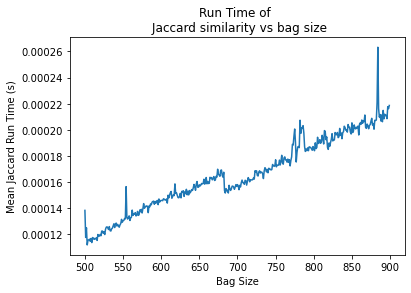

In [13]:
%matplotlib inline
x = list(range(500,len(doc_pair_list)+500))#list of bag size
y = list_jaccard_time

plt.xlabel('Bag Size')
plt.ylabel('Mean Jaccard Run Time (s)')
plt.title('Run Time of \n Jaccard similarity vs bag size')
plt.plot(x,y)


plt.show()



We can see the plot gives us a curve. In order to find the time complexity we have to assume that the curve is in the form of  
$y = M_a.x^\alpha$.

When we can take $log$ on both sides of the equation and make it in the form $log \,y = log(M_a) \, + \alpha \, log(x)$

we get the equation of a straight line where $log \, (M_a)$ is the intercept and $\alpha $ is the slope.

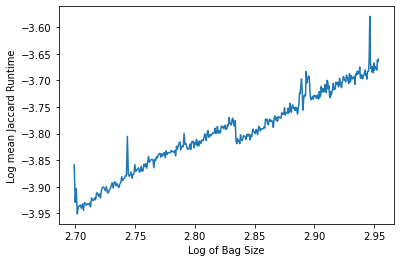

In [14]:
# Converting each element in the bag size list and the run time list to logarithmic values with base 10
logx = [ np.log10(i )for i in x]
logy = [np.log10(i) for i in y]
#plotting the graph between the log values
plt.plot(logx,logy)
plt.ylabel("Log mean Jaccard Runtime")
plt.xlabel('Log of Bag Size')
plt.show()

In [15]:
slope_jaccard,intercept, r_value, p_value ,std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print("The slope is {} and the Constant for the computation is {}".format(slope_jaccard,constant))

The slope is 0.9836284824699405 and the Constant for the computation is 2.630628286288338e-07


 we have got $\alpha$ value $\approx \, 0.98$ for multiple runs  and the constant for the computation seems to be of the order of $10^{-7}$.

So the time complexity of our implementation would be almost $O(n^{0.98})$ which is considered to be better than the worst case run time for jaccards algorithm.

## Q2) Cosine Similarity Vector iteration

* Cosine similarity is another mathematical concept which can be used to determine the similarity between two documents by finding out the angle between the two vectors. Smaller angle $\implies$ higher the $cos \, \theta$ and more similar the documents are.

* $cos\, \theta\, =\cfrac { \vec A\, \cdot \vec B}{ |A| * |B|} $

In [16]:
#Function which generates dense vector pairs as numpy arrays for finding out the cosine similarity
def densevectors_asnparray(dict1,dict2):
  list1 = list(dict1.keys())
  list2 = list(dict2.keys())
  listtogather = list(set(list1 + list2)) # creating a list of unique keys from both the dict.keys() list
  list1f =[]
  list2f= []
  for i in listtogather: #for keys in dict1, it gives the corresponding values and otherwise it appends 0
    if i in dict1.keys():
      list1f.append(dict1[i])
    else:
      list1f.append(0)

  for i in listtogather: #for keys in dict2, it gives the corresponding values and otherwise it appends 0
    if i in dict2.keys():
      list2f.append(dict2[i])
    else:
      list2f.append(0)

  return np.asarray(list1f) ,np.asarray(list2f) #finally the funciton returns numpy vectors corresponding to each dictionary


The above created densevectors_asnparray is used to create a list of numpy vector pairs and it is stored in a new list list_densevector_nppair

In [17]:
# To generate list of densevector pair in numpy array form
list_densevector_nppair = []
for i in doc_pair_list:
  list_densevector_nppair.append(densevectors_asnparray(i[0],i[1]))




In [18]:
#stores the lenght of vector pairs created so that later it can be used to plot the list lenth vs run time graph
list_len_densevector_nppair = [len(i[0]) for i in list_densevector_nppair]


## Q 2.1) The Theoretical worst case running time of cosine similarity for vector iteration.

The cosine similarity function takes in two list of numpy array, but loops through each element in the array for finding out the dot product of the vector and to find the modulus of each vector.

when we are running the created cosine similarity function `cosinesim_dot(A,B)`  we can see there are 4 for loops with time complexity of $O(n)$ which makes the entire function to have a time complexity of $\longrightarrow O(n)$



In [19]:
def modvec(vec): # Function to calculate the modulus of a vector
  sum = 0
  
  for i in vec:
    sum += i**2
  return np.sqrt(sum)

def cosinesim_dot(A,B):# function to calculate the cosine similarity by looping over individual element in the vector ie vector iteration
  sum = 0
  for i in range(len(A)):
    sum += A[i]*B[i]

  modA = modvec(A)
  modB = modvec(B)

  k = modA*modB

  return round(sum/k,4)


In [20]:
list_cosinesim_dot_time =[]
for i in list_densevector_nppair:
  k = time_it(cosinesim_dot,i[0],i[1],number_of_repeats = 300)
  list_cosinesim_dot_time.append(k)

In [21]:
#This list retains the cosine similarity values for vector iteration
list_cosinesim_dot_values = [cosinesim_dot(list_densevector_nppair[i][0],list_densevector_nppair[i][1]) for i in list(range(len(list_densevector_nppair)))]

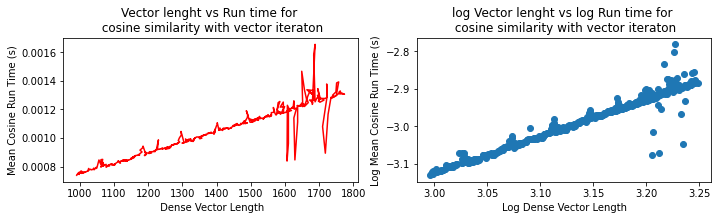

In [22]:

plt.subplots_adjust(1,0,2.5,0.5)

plt.subplot(121)
plt.plot(list_len_densevector_nppair,list_cosinesim_dot_time,'r')


plt.xlabel(' Dense Vector Length')
plt.ylabel('Mean Cosine Run Time (s)')
plt.title('Vector lenght vs Run time for \n cosine similarity with vector iteraton')

plt.subplot(122)
x = list_len_densevector_nppair
y = list_cosinesim_dot_time

logX = np.log10(x)
logY = np.log10(y)

plt.scatter(logX,logY)
plt.title('log Vector lenght vs log Run time for \n cosine similarity with vector iteraton')
plt.xlabel('Log Dense Vector Length')
plt.ylabel('Log Mean Cosine Run Time (s)')
plt.show()

In [23]:
slope_cosine_vec, intercept, r_value, p_value, std_errd = stats.linregress(logX,logY)
constant = np.power(10, intercept)
print('The slope is {} and the constant for the computation is {}'.format(slope_cosine_vec,constant))

The slope is 0.9785316762446449 and the constant for the computation is 8.736719655559144e-07


## Q 2.1) Emperical time complexity observation of cosine similarity using vector iteration.

The $\alpha $ value of the equation is $\approx 0.99$ for multiple runs $\implies O(n^{0.99})$, hence we can justify the theoretical prediction of the complexity as $O(n)$

So, emperically I can write the function as $y = 10^{-6} \, x^{0.99}$ , where $y$ is the run time of the function and $x$ is the length of the vectors.

## Q 2.2) Theoretical time complexity of cosine similarity using numpy array

The time complexity for a numpy array to access an element in an numpy array by using numpy methods is $O(1)$.

Since our function, has no list to array conversion, the theoretical time complexity of the function would be $\longrightarrow O(1)$

In [24]:
# funcion to calculate cosine similarity using numpy module
def cosinesim_numpy(A,B):
  
  
  modA = np.sqrt(np.dot(A,A))
  modB = np.sqrt(np.dot(B,B))
  AdotB = np.dot(A,B)
  x = modA * modB

  cosinesimilarity = AdotB/x

  return round(cosinesimilarity,4)


In [25]:
list_cosinenp_time = []
for i in list_densevector_nppair:
    k = time_it(cosinesim_numpy,i[0],i[1],number_of_repeats=300) #We run the algorithm 300 times, the numpy array method is very fast in computing the similarity
    list_cosinenp_time.append(k)


In [26]:
#This list retains the values of cosine similarity by using numpy array dot product
list_cosinesim_numpy_values = [ cosinesim_numpy(list_densevector_nppair[i][0],list_densevector_nppair[i][1]) for i in list(range(len(list_densevector_nppair)))]

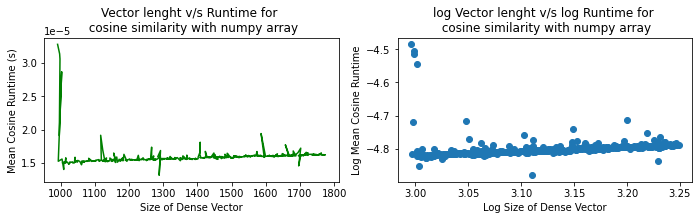

In [27]:
plt.subplots_adjust(1,0,2.5,0.5)

plt.subplot(121)
plt.plot(list_len_densevector_nppair,list_cosinenp_time,'g')
plt.ylabel('Mean Cosine Runtime (s)')
plt.xlabel('Size of Dense Vector')
plt.title('Vector lenght v/s Runtime for \n cosine similarity with numpy array')

plt.subplot(122)
x = list_len_densevector_nppair
y = list_cosinenp_time
logX = np.log10(x)
logY = np.log10(y)
plt.scatter(logX,logY)
plt.xlabel('Log Size of Dense Vector')
plt.ylabel('Log Mean Cosine Runtime')
plt.title('log Vector lenght v/s log Runtime for \n cosine similarity with numpy array')
plt.show()

In [28]:
slope_cosine_np, intercept, r_value , p_value , std_err = stats.linregress(logX,logY)
constant = np.power(10,intercept)
print('The slope is {} and the Constant for the computation is {}'.format(slope_cosine_np,constant))

The slope is 0.04083327421125693 and the Constant for the computation is 1.183909093369019e-05


The runtime for this algorithm is very less and the slope and intercept would greatly depend on the computing power of the computer.

## Q 2.2) The emperical time complexity analysis for the cosine similarity implementation using numpy array methods.

Using the numpy array method, $\alpha $ value for the function is between $0.01$ to $0.3$ for multiple runs of the algorithm, with the mode value $\approx 0.11$. The constant for the computation is of the order of $10^{-5}$.

So, we can write $y= 10^{-5} x^{0.11}$ which is $\approx 10^{-5}$. Hence emperically we got the run time of the cosine similarity using numpy array methods. They are mostly independent of the vector dimension.

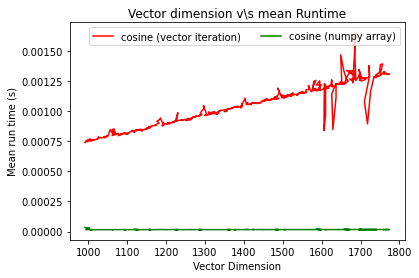

In [29]:
plt.plot(list_len_densevector_nppair,list_cosinesim_dot_time,'r')
plt.plot(list_len_densevector_nppair,list_cosinenp_time,'g')

plt.xlabel('Vector Dimension')
plt.ylabel('Mean run time (s)')
plt.title('Vector dimension v\s mean Runtime')
label =['cosine (vector iteration)', 'cosine (numpy array)']
plt.legend(label, loc = 1, ncol = 2)
plt.show()


The graph above makes it clear that vector iteration method takes significantly higher time than the cosine numpy array method algorithm.

## Q 3) Theoretical comparison of time complexity of cosine implementation using sparse dictionaries with other similarity implementations.

As there is a loop in the code to iterate through items in the dictionary the time complexity of the cosine similarity implementation using sparse representation will be $O(n)$ 

The jaccard and cosine sparse will have same time complexity $O(n)$

In [30]:
def dot(d1,d2):#Here the inputs are dictionaries
    if len(d1) < len(d2):
        a = d1
        b = d2
    else:
        a = d2
        b = d1
    dotproduct = 0
    #for each key in the dictionary1, if there is similar key in dictionary2, then the values of both the keys are multiplied and added to the 'dotproduct' 
    for word,count in a.items():
        dotproduct += count * b.get(word,0)
    return dotproduct

def cosinesim_sparse(d1,d2):
    numerator = dot(d1,d2)# calls the dot function created earlier
    denominator = np.sqrt(dot(d1,d1)*dot(d2,d2))
    return round(numerator/denominator,4)
  
    


In [31]:
#To get the list of average running time for cosine similarity using sparse(dictionary) representation
list_cosinesim_sparse_time = []
for i in doc_pair_list:
  k = time_it(cosinesim_sparse,i[0],i[1],number_of_repeats=300)
  list_cosinesim_sparse_time.append(k)


In [32]:
#This list retains the cosine similarity values for the sparse comparison
list_cosinesim_sparse_values = [cosinesim_sparse(doc_pair_list[i][0],doc_pair_list[i][1])    for i in list(range(len(doc_pair_list)))]

In [33]:
#The following list retains the list of lenght of the document pair list
list_len_doc_pair_list = [len(i[0]) for i in doc_pair_list]

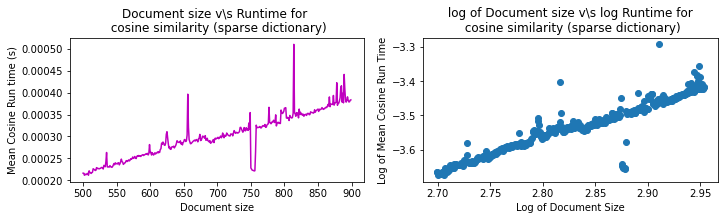

In [34]:
x = list_len_doc_pair_list
y = list_cosinesim_sparse_time
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(x,y,'m')
plt.xlabel("Document size")
plt.ylabel("Mean Cosine Run time (s)")
plt.title('Document size v\s Runtime for \n cosine similarity (sparse dictionary)')
plt.subplot(122)
logx = np.log10(x)
logy = np.log10(y)

plt.scatter(logx,logy)
plt.xlabel('Log of Document Size')
plt.ylabel('Log of Mean Cosine Run Time')
plt.title(' log of Document size v\s log Runtime for \n cosine similarity (sparse dictionary)')

plt.show()

In [35]:
slope_cosine_sparse , intercept, r_value , p_value , std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print('The slope is {} and the constant for the computation is {}'.format(slope_cosine_sparse,constant))

The slope is 0.9503221006441873 and the constant for the computation is 5.941556074449636e-07


After multiple runs we can see that emperically the time complexity of the cosine similarity implementation using sparse representation $\approx O(n^{0.9})$ which is slightly better than the worst case of $O(n)$ we determined theoretically.

## Q 3.1) Examining the correctness of the similarities

In [36]:
data_dict = {'Jaccard similarity': list_jaccard_values,'cosine similarity(using vector iteration)':list_cosinesim_dot_values, 'cosine similarity(using numpy array)':list_cosinesim_numpy_values,'cosine similarity(using sparse representation)':list_cosinesim_sparse_values}

In [37]:
df = pd.DataFrame(data_dict)
df

,Jaccard similarity,cosine similarity(using vector iteration),cosine similarity(using numpy array),cosine similarity(using sparse representation)
0,0.0022,0.0001,0.0001,0.0001
1,0.0024,0.0002,0.0002,0.0002
2,0.0301,0.0697,0.0697,0.0697
3,0.0341,0.0865,0.0865,0.0865
4,0.0184,0.0156,0.0156,0.0156
...,...,...,...,...
395,0.0298,0.0333,0.0333,0.0333
396,0.0441,0.2263,0.2263,0.2263
397,0.0177,0.0070,0.0070,0.0070
398,0.0242,0.0241,0.0241,0.0241



From the dataframe above we can see that there is difference between the similarity measures of jaccard and cosine implementations. We can also notice that all the different implementations of the cosine similarity gives the same values for similarity.

## Q 3.2) Comparison between various similarity measures

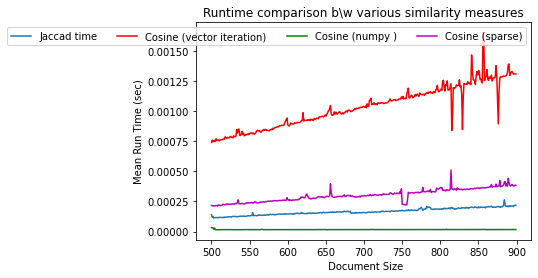

In [38]:
 plt.plot(list_len_doc_pair_list,list_jaccard_time)
 plt.plot(list_len_doc_pair_list,list_cosinesim_dot_time,'r')
 plt.plot(list_len_doc_pair_list,list_cosinenp_time,'g')
 plt.plot(list_len_doc_pair_list,list_cosinesim_sparse_time,'m')
 label = ['Jaccad time','Cosine (vector iteration)','Cosine (numpy )','Cosine (sparse)']
 plt.legend(label, loc = 1, ncol =4)
 plt.xlabel(' Document Size')
 plt.ylabel('Mean Run Time (sec)')
 plt.title('Runtime comparison b\w various similarity measures')
 plt.show()


We can see from the graph above that the Cosine similarity using numpy array module has the least runtime, then followed by jaccard's algorithm which is followed by cosine sparse.
Among all the four similarity implementations, the Cosine similarity using vector iteration will have the worst running time.

## Q 4) All pair similarity for collection of documents

In [39]:
def all_pair_comparison(list_of_documents, method= 'jaccard'):  #Function created to calculate the all pair similarities of the jaccards and cosine implementation.
  all_pair_similarity = []
  #for jaccard similarity
  if method =='jaccard':
    for i in list_of_documents:
      for j in list_of_documents:
        all_pair_similarity.append(jaccard(i,j))
  #for cosine similarity using vector iteration      
  if method == 'cosine_vector':
    for i in list_of_documents:
      for j in list_of_documents:
        a,b = densevectors_asnparray(i,j)
        k = cosinesim_dot(a,b)
        all_pair_similarity.append(k)
  #for cosine similarity using numpy dot operation
  if method == 'cosine_numpy':
    for i in list_of_documents:
      for j in list_of_documents:
        a,b = densevectors_asnparray(i,j)
        k = cosinesim_numpy(a,b)
        all_pair_similarity.append(k)
  #for cosine similarity using sparse dictionaries
  if method == 'cosine_sparse':
    for i in list_of_documents:
      for j in list_of_documents:
        k = cosinesim_sparse(i,j)
        all_pair_similarity.append(k)


  return all_pair_similarity




## Q 4.1) The theoretical worst case run time for the compution of all-pair similariy

when we run the all-pair similarity we have a nested loop for iterating through all the documents vs all the documents, which would have the time complexity of $O(n^2)$.
The inner loop then the corresponding similarity measure $O(n)$ has to run.

Hence, the time complexity of all-pair similarity would depend on the size of the list of dictionaries and the size of individual dictionary in the list.

Assuming the size of individual dictionary to be similar to the size of the list of dictionaries, we can understand that the worst case time complexity for all the similarity measures we considered except cosine similarity implementation using numpy module will be $\longrightarrow$ $O(n^3)$

## Q 4.1) The Emperical worst case run time analysis for the compution of all-pair similariy

In [40]:
# created a list of 16 documents with each dictionary has a bag size of 1000
all_pair_doc_list = doc_creation(1000,16)

In [41]:
# Here the method can be changed to other similarity methods and all pair similarity for different methods can be found for the 'all_pair_doc_list'
all_pair_comparison(all_pair_doc_list,method = 'cosine_numpy')

[1.0,
 0.0015,
 0.0015,
 0.0009,
 0.0011,
 0.0512,
 0.0006,
 0.0068,
 0.0031,
 0.0002,
 0.0009,
 0.0033,
 0.0,
 0.0,
 0.0001,
 0.0015,
 0.0015,
 1.0,
 0.0033,
 0.0129,
 0.0008,
 0.0034,
 0.0052,
 0.0337,
 0.026,
 0.0045,
 0.0015,
 0.0055,
 0.0035,
 0.0,
 0.0584,
 0.0074,
 0.0015,
 0.0033,
 1.0,
 0.0017,
 0.0,
 0.0016,
 0.0004,
 0.0215,
 0.0022,
 0.6396,
 0.0009,
 0.1092,
 0.0,
 0.0031,
 0.0007,
 0.0022,
 0.0009,
 0.0129,
 0.0017,
 1.0,
 0.0007,
 0.0561,
 0.0573,
 0.0425,
 0.0006,
 0.0782,
 0.0205,
 0.0165,
 0.0009,
 0.0029,
 0.0106,
 0.0002,
 0.0011,
 0.0008,
 0.0,
 0.0007,
 1.0,
 0.0458,
 0.0864,
 0.0031,
 0.0047,
 0.0017,
 0.0014,
 0.0062,
 0.0011,
 0.0,
 0.0012,
 0.0002,
 0.0512,
 0.0034,
 0.0016,
 0.0561,
 0.0458,
 1.0,
 0.0023,
 0.0054,
 0.0018,
 0.0003,
 0.0003,
 0.0027,
 0.0021,
 0.0064,
 0.0672,
 0.0,
 0.0006,
 0.0052,
 0.0004,
 0.0573,
 0.0864,
 0.0023,
 1.0,
 0.0003,
 0.0001,
 0.0004,
 0.0199,
 0.0034,
 0.0,
 0.0002,
 0.0,
 0.0002,
 0.0068,
 0.0337,
 0.0215,
 0.0425,
 0.0031,

In [42]:
#genereates a list of list of dictionaries where the lenght of individual dictionary is same as the size of list of dictionary
list_of_list_all_pair_doc = []
for i in range(50,65):
  list_of_list_all_pair_doc.append(doc_creation(i,i))

In [43]:
#The run time of all pair similarity  using jaccard's similarity for list of list of dictionaries is stored in 'list_of_list_all_pair_run_time'
list_of_list_all_pair_run_time =[]
for i in range(len(list_of_list_all_pair_doc)):
  k = time_it(all_pair_comparison,list_of_list_all_pair_doc[i])
  list_of_list_all_pair_run_time.append(k)

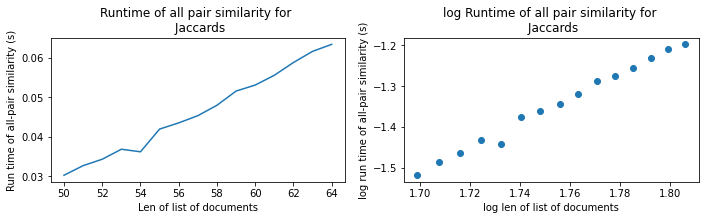

In [44]:
y = list_of_list_all_pair_run_time
x = range(50,65)

plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('Len of list of documents')
plt.ylabel('Run time of all-pair similarity (s)')
plt.title('Runtime of all pair similarity for \n Jaccards')

plt.subplot(122)
logx = np.log10(x)
logy = np.log10(y)
plt.scatter(logx,logy)
plt.xlabel('log len of list of documents')
plt.ylabel('log run time of all-pair similarity (s)')
plt.title('log Runtime of all pair similarity for \n Jaccards')

plt.show()

In [45]:
slope, intercept, r_value, p_value , std_err = stats.linregress(logx,logy)
constant = np.power(10, intercept)
print('The slope is {} and the constant for the computation is {}'.format(slope,constant))

The slope is 3.036919303604571 and the constant for the computation is 2.1137736545294483e-07


The emperical analysis shows that, for time complexity of all-pair similarity using Jaccard's method the  $\alpha \, \approx 3.0  $ and  $C_a \approx 10^{-7} \implies$ that the worst case time complexity of all-pair similarity is $\longrightarrow O(n^{3.0})$  this justifies our theoretical worst case run time prediction.


In [46]:
list_of_list_all_pair_run_time_cosine =[]
for i in range(len(list_of_list_all_pair_doc)):
  k = time_it(all_pair_comparison,list_of_list_all_pair_doc[i],method = 'cosine_sparse')
  list_of_list_all_pair_run_time_cosine.append(k)

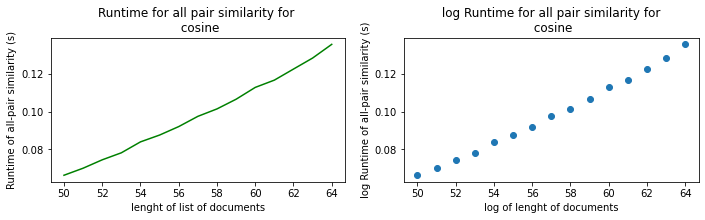

In [47]:
y = list_of_list_all_pair_run_time_cosine
x = list(range(50,65))

plt.subplots_adjust(1,0,2.5,0.5)

plt.subplot(121)
plt.plot(x,y,'g')
plt.ylabel('Runtime of all-pair similarity (s)')
plt.xlabel('lenght of list of documents')
plt.title('Runtime for all pair similarity for \n cosine')
plt.subplot(122)

logx = np.log10(x)
logy = np.log10(y)

plt.scatter(x,y)
plt.xlabel('log of lenght of documents')
plt.ylabel('log Runtime of all-pair similarity (s)')
plt.title(' log Runtime for all pair similarity for \n cosine')
plt.show()

In [48]:
slope , intercept, r_value, p_value, std_err = stats.linregress(logx, logy)
constant = np.power(10,intercept)
print('The slope is {} and the constant for the computation is {}'.format(slope , constant))

The slope is 2.8627755633581424 and the constant for the computation is 9.107434066397252e-07


The emperical analysis of all-pair time complexity for cosine similarity with sparse representation the $\alpha \, \approx 2.9  $ and  $C_a \approx 10^{-7} \implies$ the worst case time complexity of all-pair similarity is $\longrightarrow O(n^{2.9})$ which justifies the theoretical worst case runtime prediction.

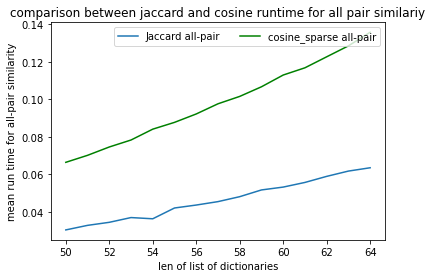

In [49]:
plt.plot(list(range(50,65)),list_of_list_all_pair_run_time)
plt.plot(list(range(50,65)),list_of_list_all_pair_run_time_cosine,'g')
plt.ylabel('mean run time for all-pair similarity')
plt.xlabel('len of list of dictionaries')
label = ['Jaccard all-pair', 'cosine_sparse all-pair']
plt.title('comparison between jaccard and cosine runtime for all pair similariy')
plt.legend(label, loc =1 , ncol = 2)
plt.show()


The graph above makes it evident that when there is a smaller list of list of dictionaries, cosine sparse implementation takes more time when compared to jaccards similarity.

## Q 4.2) RunTime prediction for running all-pair similarity for 200k documents
We can find the runtime by substituting the 200 K documents into the equations obtained for both Jaccard's Similarity and cosine sparse implementation.

### If individual document size is also in the order of 200k:

If we use jaccard's similarity then substituting into the algorithm we will be able to see: $y \approx 10^{-7} 200000^{3.1} \implies 2.7\times 10^{9}s$
 Alternatly if we use the cosine_sparse method, we would be getting: $y \approx 10^{-6} 200000^{2.9} \implies 2.36\times  10^{8}s$ $\longrightarrow$ But in case of cosine sparse, the slope of the cosine sparse increases as the lenght of list of   list increases hence the probabilty of this value being wrong is high.

### If we consider very small individual document size when compared to 200k documents:
The time complexity would be $\approx O(n^2)$ 
 If Jaccard's algorithm is used then it would be: $y \approx 10^{-7} 200000^{2} \implies 4\times 10^{3}s$
 When the cosine_sparse method is used, we get: $y \approx 10^{-6} 200000^{2} \implies 4\times 10^{4} s$ 



## Q 5) Map Reduce paradigm

For Map reduce paradigm Google collab was used by me since it assigned only 2 cores. Hence, the total number of mappers and reducers should be 2, so we will have to assign 1 mapper and 1 reducer functions/proccesses.

Please note the following codes were run on Google collab, since interactive Python doesn't play well with multiprocessing on Windows.

## Q 5.1) All pair similarity for Jaccard using parallel processing (Map Reduce Paradigm)

In [50]:
import multiprocessing

cores = multiprocessing.cpu_count()
cores

16

In [1]:
#I have created a seperate .py file named functions so that we can import the map reduce functions in them. but unfortunatly, the code has high runtime.
from functions_assign.py import *

ModuleNotFoundError: No module named 'functions_assign'

In [52]:

# the mapper function for the map-reduce implementation
def Mapper_all_pair_jaccard(doc_):
  list_output = []
  (i,j,doc_i,doc_j) = doc_
  

  similarity_ = jaccard(doc_i,doc_j)
  list_output.append(((i,j),similarity_))
  return list_output

In [53]:
def map_reduce_parallel(inputs,mapper,reducer,mapprocesses=1,reduceprocesses=1):
    
    collector=defaultdict(list)  #this is the dictionary where we will be storing intermediate results
                                 #it will map keys to lists of values (default value of a list is [])
    
    mappool = Pool(processes=mapprocesses)
    #map stage
    
    mapresults=mappool.map(mapper,inputs)
    mappool.close()
    
    for mapresult in mapresults:
        for (key, value) in mapresult:     #pass each input to the mapper function and receive back each key,value pair yielded
            collector[key].append(value)     #append the value to the list for that key in the intermediate store
            
    #reduce stage 
    outputs=[]
    reducepool = Pool(processes=reduceprocesses)
    
    reduceresults=reducepool.map(reducer,collector.items())
    reducepool.close()
    for reduceresult in reduceresults:
        outputs+=reduceresult
   
    return outputs

In [54]:
#The reducer function for the map-reduce implementation
def reducer_all_pair(item):
  (keys,values) = item
  output_reducer = [(keys,values)]
  return (output_reducer)

In [55]:
def mapreduce_allpair_jaccard (all_pair_docc_list):
  mapper_iterator = []
  for i in range(len(all_pair_docc_list)):
    for j in range (len(all_pair_docc_list)):
      mapper_iterator.append((i,j,all_pair_docc_list[i],all_pair_docc_list[j]))

  return map_reduce_parallel(mapper_iterator,Mapper_all_pair_jaccard,reducer_all_pair)

In [ ]:
#stores the result as a list of tuples with doument index and its corresponding similarity measure
result_jaccard = mapreduce_allpair_jaccard(all_pair_doc_list)

In [ ]:
print(result_jaccard)

In [ ]:
jaccard_values =all_pair_comparison(all_pair_doc_list,method='jaccard')
document_index = [i[0] for i in result_jaccard]
jaccard_similarity_mr = [i[1] for i in result_jaccard]


In [ ]:
data = {'document index': document_index, 'jaccard similarity using mapreduce': jaccard_similarity_mr, 'jaccard similarity without mapreduce': jaccard_values }
df_jacc = pd.DataFrame(data)
df_jacc

by comparing we can see that jaccard similarity using mapreduce would give the same results as jaccard similarity without using mapreduce. hence, we can say that the Map Reduce implementation for jaccards similarity is correct.

## Q 5.2) All pair similarity using cosine similarity using parallel processing

In [ ]:
#defining mapper function for cosine similarity 
def Mapper_all_pair_cosine(doc_):
  list_output = []
  (i,j,doc_i,doc_j) = doc_
  

  similarity_ = cosinesim_sparse(doc_i,doc_j)
  list_output.append(((i,j),similarity_))
  return list_output

In [ ]:
#defining the main mapreduce function to be called for computing cosine similarity
def mapreduce_allpair_cosine (all_pair_docc_list):
  mapper_iterator = []
  for i in range(len(all_pair_docc_list)):
    for j in range (len(all_pair_docc_list)):
      mapper_iterator.append((i,j,all_pair_docc_list[i],all_pair_docc_list[j]))

  return map_reduce_parallel(mapper_iterator,Mapper_all_pair_cosine,reducer_all_pair)

In [ ]:
#stores result as a list of tuples with doument index and corresponding similarity measure
result_cosine = mapreduce_allpair_cosine(all_pair_doc_list)

In [ ]:
print(result_cosine) 

In [ ]:
cosine_values =all_pair_comparison(all_pair_doc_list,method='cosine_sparse')
document_index = [i[0] for i in result_cosine]
cosine_similarity_mr = [i[1] for i in result_cosine]


In [ ]:
data = {'document index': document_index, 'cosine similarity using mapreduce': cosine_similarity_mr, 'cosine similarity without mapreduce': cosine_values }
df_cos = pd.DataFrame(data)
df_cos

In [ ]:
#creates list of 100 dictionaries with bag size of 100
all_pair_doc_list_100 = doc_creation(100,100)
all_pair_doc_list_100[0]

In [ ]:
#the average time taken to run the all pair similarity using MapReduce is found out

a=time_it(mapreduce_allpair_jaccard,all_pair_doc_list_100,number_of_repeats=5)
b=time_it(mapreduce_allpair_cosine,all_pair_doc_list_100,number_of_repeats=5)
print('The average time taken to find all pair similarity of 100 documents with bagsize of 100: \n {} seconds using jaccard \n {} seconds using cosine'.format(a,b))


The run time for the cosine all pair similarity for 100 documents is greater without using map reduce functions.
When we increase the number of documents, map reduce paradigm of cosine all pair similarity would give better runtime and efficiency than the normal method.

# Summary

This report contained the analysis of time complexities for Jaccards and different implementations of cosine similarities.
The analysis was done theoretically and empericaly to compare if both were in terms with each other.

From my analysis on Jaccards similarity algorithm, When i ran the algorithm i was able to emperically find the time complexity to be approximately $\longrightarrow O(n^.98)$
which is better than the observed theoretical time complexity.

I performed similar analysis on the different implementations of cosine similarity and i found the time complexities as $ 𝑂(𝑛^{0.95}) $, $𝑂(𝑛^{0.11})$ and $𝑂(𝑛^{0.89}) $.

I found that the cosine similarity using vector numpy array has the least time complexity $O(1)$ and other similarities are of the time complexity $O(n)$. This means that cosine similarity using numpy array is the most efficient.

The cosine similarity using vector iteration is very time consuming compared to other methods even though other methods (except cosine using numpy) also has time complexity of $O(n)$.

I have created function to calculate all pair similarity with parameter specifying similarity measure. I theoretically and emperically found the time complexities for jaccard's and cosine similarity meausres.

Finally a map reduce paradigm is implemented for implementing parallel processing. The parallel processing was done on google collab notebook, since multiprocessing on windows with interactive python wont work as expected.